# Interpolate

In [1]:
from smpl import plot
from smpl import stat
from smpl import data
from smpl import interpolate
import numpy as np

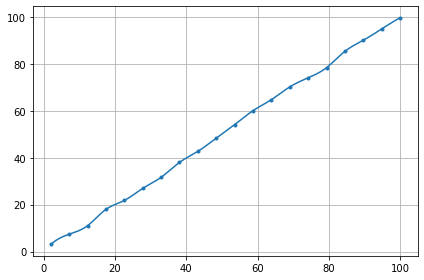

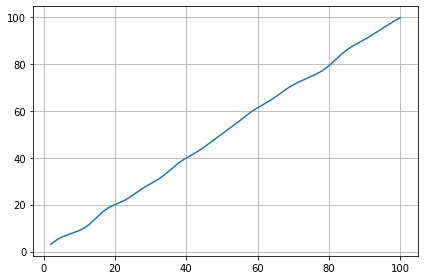

In [2]:
x = np.linspace(2,100,20)
y = stat.noisy(x)
plot.data(x,y,interpolate=True)
plot.show()
plot.data(x,y,interpolate=True,also_data=False)
plot.show()

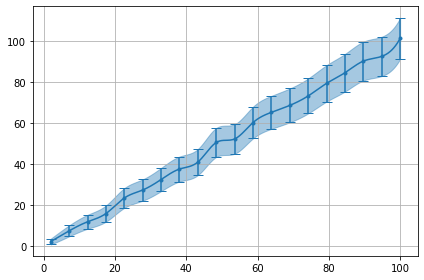

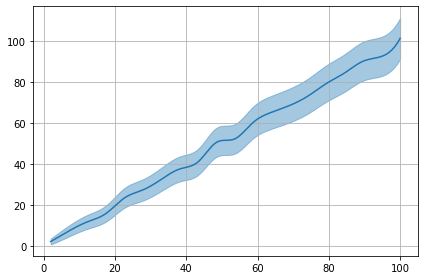

In [3]:
x = np.linspace(2,100,20)
y = stat.poisson_dist(stat.noisy(x))
plot.data(x,y,interpolate=True,sigmas=1,show=True)
plot.data(x,y,interpolate=True,sigmas=1,also_data=False)

[-10.  -5.   0.   5.  10. -10.  -5.   0.   5.  10. -10.  -5.   0.   5.
  10. -10.  -5.   0.   5.  10. -10.  -5.   0.   5.  10.] [-10. -10. -10. -10. -10.  -5.  -5.  -5.  -5.  -5.   0.   0.   0.   0.
   0.   5.   5.   5.   5.   5.  10.  10.  10.  10.  10.]


TypeError: unsupported operand type(s) for ** or pow(): 'bool' and 'dict'

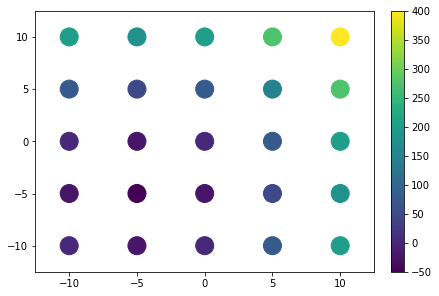

In [4]:
xvalues = np.linspace(-10,10,5)
yvalues = np.linspace(-10,10,5)
xx, yy = data.flatmesh(xvalues, yvalues)
zz=xx**2+yy**2+10*xx+10*yy
print(xx,yy)
plot.plot2d(xx,yy,zz,fill_missing=False,style='scatter',logz=False)
f=interpolate.interpolate(xx,yy,zz)
xvalues = np.linspace(-10,10,11)
yvalues = np.linspace(-10,10,11)
xx, yy = data.flatmesh(xvalues, yvalues)
plot.plot2d(xx,yy,f(xx,yy),fill_missing=False,style='scatter',logz=False)
print(xx,yy,zz)
print(f(xx,yy))
f(10,10)